In [1]:
import pandas as pd
import seaborn as sns
import nltk
import numpy as np
import wordcloud

In [5]:
# !wget -O yelp_rev.json https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/classification-of-yelp-restaurant-reviews-using-sentiment-analysis/asset/sample_data.json

--2022-04-29 17:40:45--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/classification-of-yelp-restaurant-reviews-using-sentiment-analysis/asset/sample_data.json
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 70142708 (67M) [application/json]
Saving to: ‘data/yelp_rev.json’

data/yelp_rev.json  100%[===================>]  66.89M  1.24MB/s    in 53s     

2022-04-29 17:41:41 (1.25 MB/s) - ‘data/yelp_rev.json’ saved [70142708/70142708]



In [6]:
rev = pd.read_json('yelp_rev.json')
print(rev.info())
rev.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86354 entries, 0 to 86353
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   index        86354 non-null  int64         
 1   review_id    86354 non-null  object        
 2   user_id      86354 non-null  object        
 3   business_id  86354 non-null  object        
 4   stars        86354 non-null  int64         
 5   useful       86354 non-null  int64         
 6   funny        86354 non-null  int64         
 7   cool         86354 non-null  int64         
 8   text         86354 non-null  object        
 9   date         86354 non-null  datetime64[ns]
 10  year         86354 non-null  int64         
dtypes: datetime64[ns](1), int64(6), object(4)
memory usage: 7.9+ MB
None


,index,review_id,user_id,business_id,stars,useful,funny,cool,text,date,year
0,4686059,aFz1itIWIl7Qojxhpa0VoQ,SsUKdScC6NKcnFFio75wMA,H1ifIm6P1TgCjxM-TOlgTw,1,1,1,0,Ok so now i go to see a movie and homeboy hand...,2016-11-19 20:40:09,2016
1,6762380,s_ba4NB2G2QWS3izLkvl5Q,q5zFh3bhuLy6u7CzYlsa8Q,3r3RHfuLPgRSiRkp5udXSw,5,0,0,0,"It wasn't my choice to eat breakfast here, but...",2019-09-02 17:40:35,2019
2,491263,K1I5yuJICQpInOy-wCCo9A,UqqqBhqlAHiHfB_V3BNmvw,ljGzs5MhfnH1pKfJjFFRlQ,5,0,0,0,The staff is very friendly and I really like D...,2017-06-25 01:27:59,2017
3,6662859,NOwHErM1-u4d8Z6vSS7FwA,cmHaLdW8ssAXK2MKZ2idmw,xoJSkBTusOEt8PPvuw2qEQ,1,0,2,0,I usually have a great experience here but lef...,2017-02-05 20:22:26,2017
4,7361472,JjvOoHUs-OrPEnuUUanDsw,dTSwfFTTHPHwSe48qDkPXg,wTBid_bYRigHAl6vNHYeOQ,5,4,1,1,UPDATE:\nI have been contacted shortly after t...,2016-03-03 17:59:40,2016


In [7]:
rev['text'][10810]

'I love Stumptown Coffee! This location has a cool vibe and lots of seating. This was one of our favorite coffee spots on our trip to Portland.'

In [8]:
reviews=rev[['text','stars']]

Text(0, 0.5, 'count')

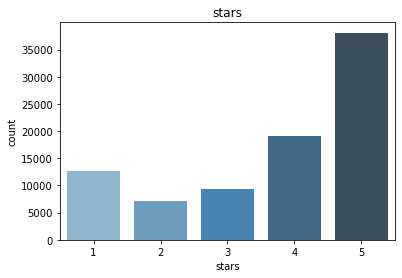

In [16]:
cplot = sns.countplot(x='stars', data=reviews, palette="Blues_d")
cplot.set_title('stars')
cplot.set_ylabel('count')

## TEXT CLEANING

In [9]:
from nltk.corpus import stopwords
import string
cachedStopWords = stopwords.words("english")
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [28]:
# nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/mehdielhaylali/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [43]:
# from nltk.stem import WordNetLemmatizer
# wnl = WordNetLemmatizer()

from nltk.stem import PorterStemmer  
ps = PorterStemmer()

def remove_punc_stopword(text):

    remove_punc = [ch for ch in text.lower() if ch not in string.punctuation]
    remove_punc = ''.join(remove_punc)
#     return [wnl.lemmatize(word) for word in remove_punc.split() if word not in cachedStopWords]
    return [ps.stem(word) for word in remove_punc.split() if word not in cachedStopWords]

In [64]:
wnl.lemmatize('ran', pos="v")

'run'

In [53]:
ps.stem('would')

'would'

In [44]:
cleaned_reviews = reviews.copy()
cleaned_reviews['text'] = reviews['text'].apply(remove_punc_stopword)

In [34]:
reviews['text'][0]

'Ok so now i go to see a movie and homeboy hands me a sheet.  where do you want to sit? \nim like "whatever bro ill find my seat when I walk in."\n"oh its all reserved seating "\n\nthats the most idiotic thing ive ever heard.   lazy millenials cant even bother to search for a seat.  gotta reserve them like a bunch of petulant little sissys.'

In [35]:
print(cleaned_reviews['text'][0])

['ok', 'go', 'see', 'movie', 'homeboy', 'hands', 'sheet', 'want', 'sit', 'im', 'like', 'whatever', 'bro', 'ill', 'find', 'seat', 'walk', 'oh', 'reserved', 'seating', 'thats', 'idiotic', 'thing', 'ive', 'ever', 'heard', 'lazy', 'millenials', 'cant', 'even', 'bother', 'search', 'seat', 'gotta', 'reserve', 'like', 'bunch', 'petulant', 'little', 'sissys']


In [30]:
print(cleaned_reviews['text'][0])

['ok', 'go', 'see', 'movie', 'homeboy', 'hand', 'sheet', 'want', 'sit', 'im', 'like', 'whatever', 'bro', 'ill', 'find', 'seat', 'walk', 'oh', 'reserved', 'seating', 'thats', 'idiotic', 'thing', 'ive', 'ever', 'heard', 'lazy', 'millenials', 'cant', 'even', 'bother', 'search', 'seat', 'gotta', 'reserve', 'like', 'bunch', 'petulant', 'little', 'sissy']


In [65]:
print(cleaned_reviews['text'][0])

['ok', 'go', 'see', 'movi', 'homeboy', 'hand', 'sheet', 'want', 'sit', 'im', 'like', 'whatev', 'bro', 'ill', 'find', 'seat', 'walk', 'oh', 'reserv', 'seat', 'that', 'idiot', 'thing', 'ive', 'ever', 'heard', 'lazi', 'milleni', 'cant', 'even', 'bother', 'search', 'seat', 'gotta', 'reserv', 'like', 'bunch', 'petul', 'littl', 'sissi']


In [38]:
string.punctuation.split()

['!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~']

In [51]:
# nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/mehdielhaylali/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [52]:
# using nltk
from nltk.tokenize import word_tokenize
def nltk_tokenizer(text):
    tokens = word_tokenize(text.lower())
    return [token for token in tokens if token not in cachedStopWords and token not in string.punctuation]

nltk_cleaned_reviews = reviews.copy()
nltk_cleaned_reviews['text'] = reviews['text'].apply(nltk_tokenizer)

In [53]:
print(nltk_cleaned_reviews['text'][0])

['ok', 'go', 'see', 'movie', 'homeboy', 'hands', 'sheet', 'want', 'sit', 'im', 'like', '``', 'whatever', 'bro', 'ill', 'find', 'seat', 'walk', "''", '``', 'oh', 'reserved', 'seating', '``', 'thats', 'idiotic', 'thing', 'ive', 'ever', 'heard', 'lazy', 'millenials', 'cant', 'even', 'bother', 'search', 'seat', 'got', 'ta', 'reserve', 'like', 'bunch', 'petulant', 'little', 'sissys']


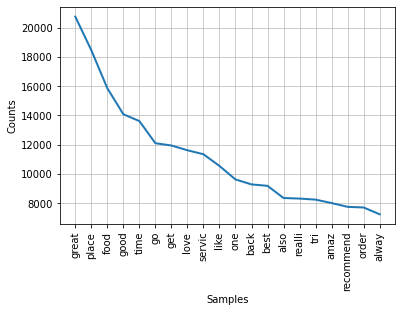

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [100]:
positive_reviews = cleaned_reviews['text'][cleaned_reviews.stars==5]
all_tokens = np.concatenate(positive_reviews.values)
FreqDist(all_tokens).plot(20)

In [46]:
negative_reviews = cleaned_reviews['text'][cleaned_reviews.stars==1]
negative_reviews.shape

(12711,)

In [47]:
all_tokens = np.concatenate(negative_reviews.values)
len(all_tokens)

901646

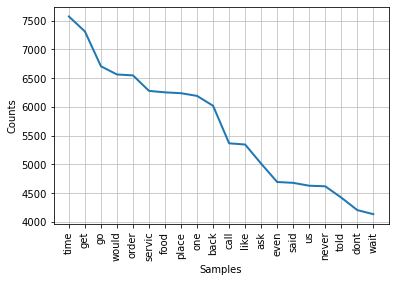

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [48]:
from nltk.probability import FreqDist
FreqDist(all_tokens).plot(20)

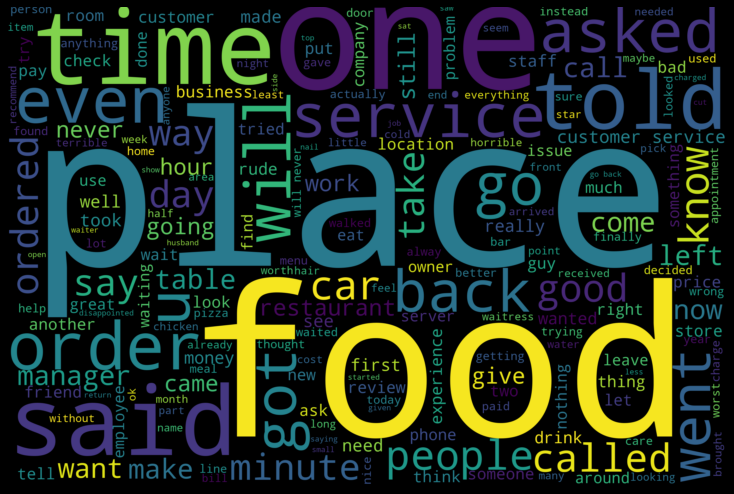

In [71]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

startext = ' '.join(rev['text'][rev.stars==1])
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(startext))

fig = plt.figure(
    figsize = (10, 7),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)


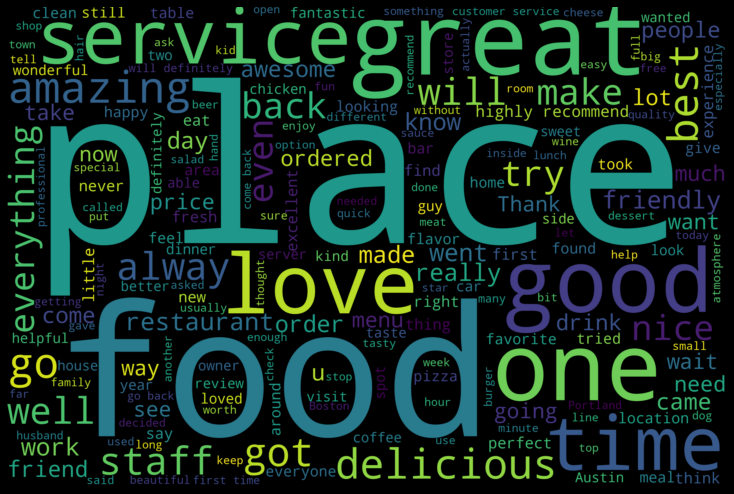

In [72]:
startext = ' '.join(rev['text'][rev.stars==5])
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(startext))

fig = plt.figure(
    figsize = (10, 7),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)

## Analyzing reviews for a specific business

In [73]:
restaurant = rev[rev.business_id==rev.loc[86353,:].business_id]
restaurant.head()

,index,review_id,user_id,business_id,stars,useful,funny,cool,text,date,year
17048,5158327,vb-_W-2LaTJUW-Wx0Q0FZg,NAa6fbFwzEKTjASMHPmv_Q,xFEyKgGkgOycAsJvVsUzVw,5,1,1,0,Katsu Currry Chicken is probably the BEST THIN...,2011-10-27 16:22:04,2011
19899,5894590,-Rc5jxwvbGd3pA_78e6U4Q,3mpsIk-UqhedQDxx24UKOw,xFEyKgGkgOycAsJvVsUzVw,5,0,0,0,Great place to have dinner. I was just there ...,2011-09-29 01:46:39,2011
19936,5860246,DSQPhNPgNYJSS3eXaJhXEQ,gqJ5LOG-eg1O_06peeUkLQ,xFEyKgGkgOycAsJvVsUzVw,4,0,0,0,A pretty decent Japanese restaurant. Ordered t...,2015-01-03 14:20:48,2015
25475,5811050,WOkOH97WqY96leXOXJbY5w,JfSEZtYwQiwq_PL68b80PQ,xFEyKgGkgOycAsJvVsUzVw,5,0,0,1,Conveniently located adjacent to the Back Bay ...,2019-08-16 12:44:34,2019
34020,5185078,2nWe8WvFlxa5kt8sLx8itQ,mL6q_AbyQSsoVJIMFwYjfQ,xFEyKgGkgOycAsJvVsUzVw,4,0,0,0,Can't believe I havent been here before in the...,2010-10-07 22:01:40,2010


In [95]:
from sklearn.feature_extraction.text import CountVectorizer
selected_words = ['awesome', 'great', 'fantastic', 'amazing', 'love', 'horrible', 'bad', 'terrible', 
                  'awful', 'wow', 'hate']
vectorizer = CountVectorizer(vocabulary=selected_words, lowercase=True)

selected_word_count = vectorizer.fit_transform(restaurant['text'].values.astype('U'))
vectorizer.get_feature_names()

['awesome',
 'great',
 'fantastic',
 'amazing',
 'love',
 'horrible',
 'bad',
 'terrible',
 'awful',
 'wow',
 'hate']

In [96]:
word_count_array = selected_word_count.toarray()
print(word_count_array)
word_count_array.shape

[[0 0 0 0 0 0 0 0 0 0 0]
 [0 2 0 0 0 0 0 0 0 0 0]
 [1 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 4 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0]
 [0 1 1 0 1 0 0 0 0 0 0]
 [0 1 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0]
 [0 1 0 1 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 1 0 0 0 0]]


(13, 11)

In [97]:
rest = pd.DataFrame(data = word_count_array.sum(axis=0) , index=vectorizer.get_feature_names(), columns=['count'])

<AxesSubplot:>

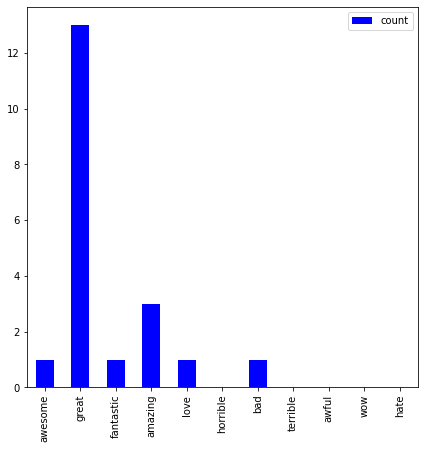

In [98]:
rest.plot(kind='bar', figsize=[7,7], colormap='winter')

## Classification 

In [102]:
from sklearn.model_selection import train_test_split
data = rev[(rev.stars==1) | (rev.stars==5)]
x = data['text']
y = data['stars']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42, stratify=y) 
count_vec = CountVectorizer().fit(x_train)
x_train = count_vec.transform(x_train)
x_test = count_vec.transform(x_test)

In [117]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB(alpha=1)
mnb.fit(x_train,y_train)
mnb.score(x_train,y_train)

0.9416599001008833

In [120]:
mnb.score(x_test,y_test)

0.9280582619820884

In [119]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
predmnb = mnb.predict(x_test)
print(classification_report(y_test, predmnb))

              precision    recall  f1-score   support

           1       0.84      0.88      0.86      2542
           5       0.96      0.94      0.95      7619

    accuracy                           0.93     10161
   macro avg       0.90      0.91      0.91     10161
weighted avg       0.93      0.93      0.93     10161



In [121]:
print(confusion_matrix(y_test,predmnb))

[[2249  293]
 [ 438 7181]]


In [125]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_trans = TfidfTransformer()
x_train_idf = tfidf_trans.fit_transform(x_train)
x_test_idf = tfidf_trans.transform(x_test)

In [128]:
mnb = MultinomialNB(alpha=1)
mnb.fit(x_train_idf,y_train)
mnb.score(x_train_idf,y_train)

0.8892497723973327

In [129]:
mnb.score(x_test_idf,y_test)

0.8678279696880228